# 1. The Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [58]:
X_lin = np.random.rand(100, 1)
y_lin = np.random.rand(100, 1) + 3*X_lin + 4

Text(0, 0.5, 'y')

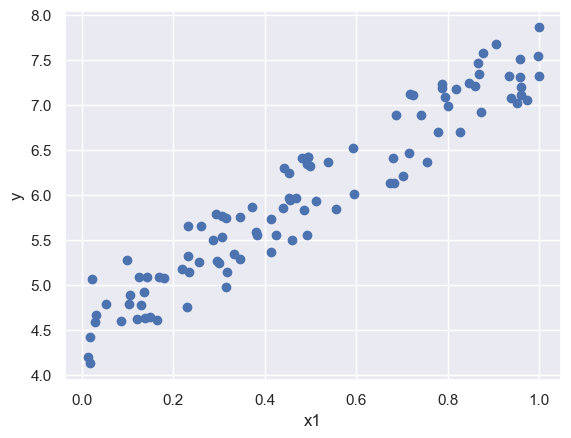

In [59]:
plt.scatter(X_lin, y_lin, c='b')
plt.xlabel('x1')
plt.ylabel('y')

In [60]:
X_b_lin = np.c_[np.ones((100, 1)), X_lin]

In [61]:
theta_best = np.dot(np.dot(np.linalg.inv(np.dot(X_b_lin.T, X_b_lin)), X_b_lin.T), y_lin)

In [23]:
theta_best

array([[4.49499458],
       [3.0255122 ]])

Text(0, 0.5, 'y')

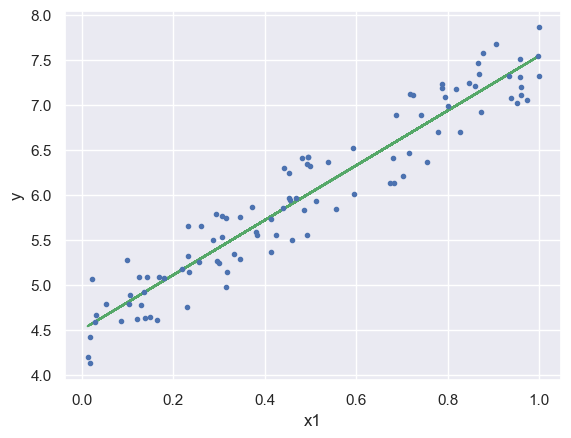

In [62]:
plt.plot(X_lin, np.dot(X_b_lin, theta_best), '-g', label='Linear Regression Line')
plt.plot(X_lin, y_lin, 'b.')
plt.xlabel('x1')
plt.ylabel('y')

In [63]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_lin, y_lin)
lin_reg.intercept_, lin_reg.coef_

(array([4.50059484]), array([[3.04327264]]))

# 2. Stochastic Gradient Descent

In [64]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X_lin, y_lin)
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([4.55199813]), array([2.97658811]))

# 3. Polynomial Regression

In [42]:
m = 100
X = 6*np.random.rand(m, 1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, 'y')

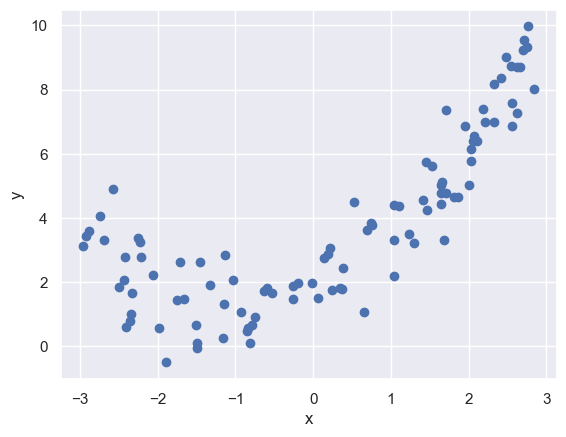

In [43]:
plt.scatter(X, y, color='b')
plt.xlabel('x')
plt.ylabel('y')

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [45]:
X[0], X_poly[0]

(array([-2.49546112]), array([-2.49546112,  6.22732622]))

In [46]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
poly_reg.intercept_, poly_reg.coef_

(array([1.78795634]), array([[1.10277532, 0.550278  ]]))

In [47]:
X_poly.shape

(100, 2)

In [48]:
poly_reg.coef_.shape

(1, 2)

Text(0, 0.5, 'y')

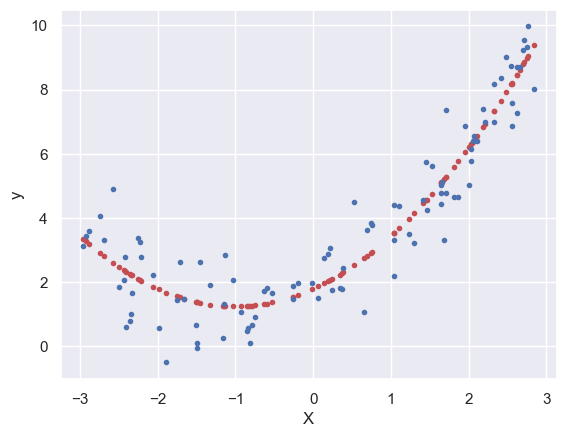

In [52]:
plt.plot(X, np.dot(X_poly, poly_reg.coef_.T)+poly_reg.intercept_, 'r.')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')

# 4. Learning Curves

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='Train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation')
    plt.legend()

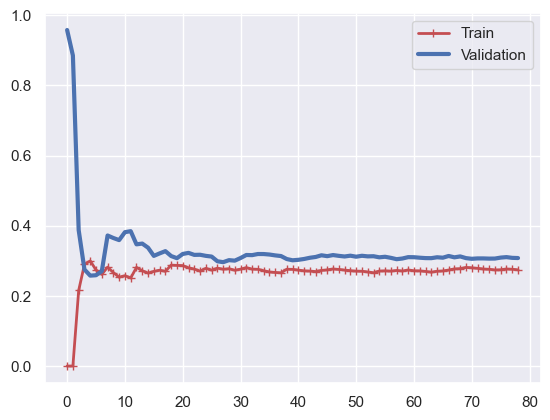

In [68]:
lin_reg_learning_curves = LinearRegression()
plot_learning_curves(lin_reg_learning_curves, X_lin, y_lin)

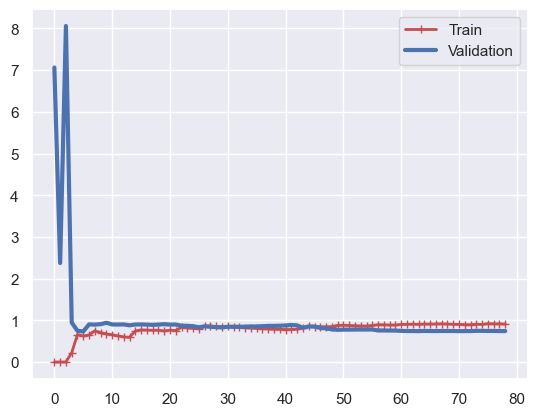

In [72]:
poly_reg_learning_curves = LinearRegression()
plot_learning_curves(poly_reg_learning_curves, X_poly, y)

# 5. Ridge Regression

Text(0, 0.5, 'y')

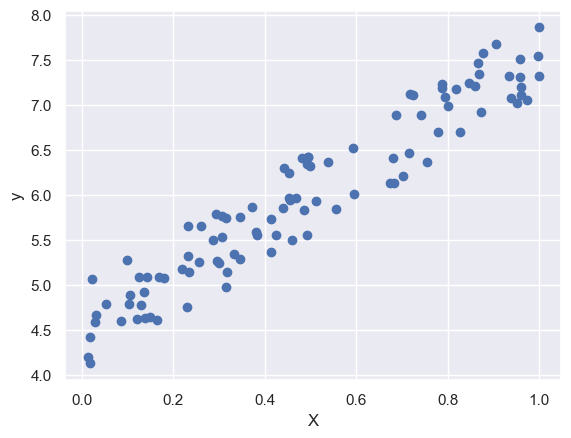

In [74]:
plt.scatter(X_lin, y_lin)
plt.xlabel('X')
plt.ylabel('y')

In [87]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_lin, y_lin)
ridge_reg.intercept_, ridge_reg.coef_

(array([4.65035193]), array([[2.73549453]]))

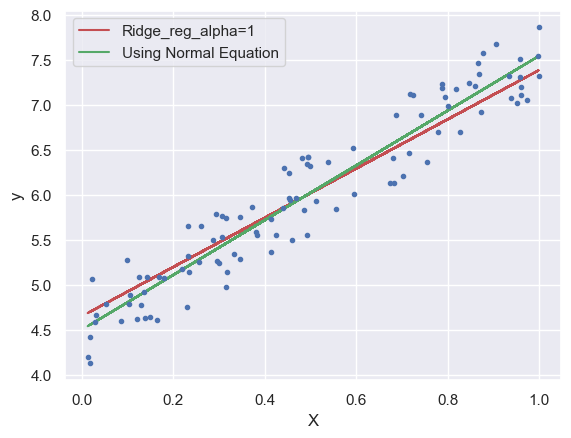

In [88]:
plt.plot(X_lin, np.dot(X_lin, ridge_reg.coef_)+ridge_reg.intercept_, 'r', label='Ridge_reg_alpha=1')
plt.plot(X_lin, np.dot(X_b_lin, theta_best), '-g', label='Using Normal Equation')
plt.plot(X_lin, y_lin, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [93]:
# Using Stochastic Gradient Descent
sgd_reg_with_l2_penelty = SGDRegressor(penalty='l2')
sgd_reg_with_l2_penelty.fit(X_lin, y_lin.ravel())
sgd_reg_with_l2_penelty.intercept_, sgd_reg_with_l2_penelty.coef_

(array([4.71026863]), array([2.59788455]))

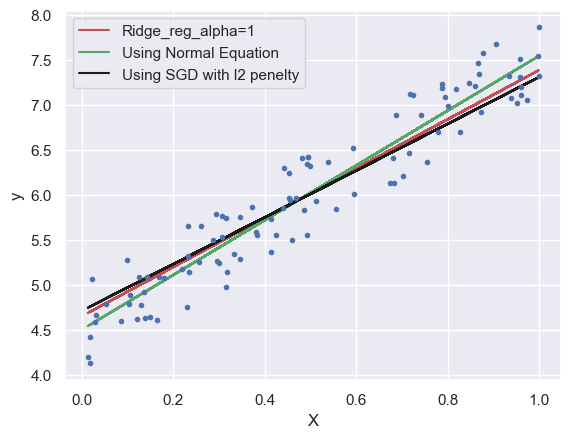

In [96]:
plt.plot(X_lin, np.dot(X_lin, ridge_reg.coef_)+ridge_reg.intercept_, 'r', label='Ridge_reg_alpha=1')
plt.plot(X_lin, np.dot(X_b_lin, theta_best), '-g', label='Using Normal Equation')
plt.plot(X_lin, np.dot(X_lin, sgd_reg_with_l2_penelty.coef_)+sgd_reg_with_l2_penelty.intercept_, 'k', label='Using SGD with l2 penelty')
plt.plot(X_lin, y_lin, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# 6. Lasso Regression

In [100]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_lin, y_lin)
lasso_reg.intercept_, lasso_reg.coef_

(array([4.55534073]), array([2.93075986]))

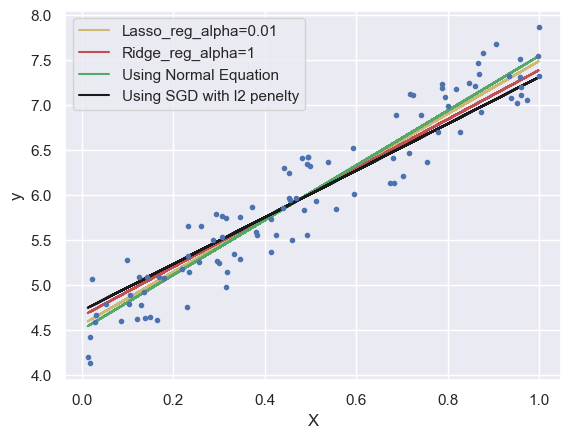

In [102]:
plt.plot(X_lin, np.dot(X_lin, lasso_reg.coef_)+lasso_reg.intercept_, 'y', label='Lasso_reg_alpha=0.01')
plt.plot(X_lin, np.dot(X_lin, ridge_reg.coef_)+ridge_reg.intercept_, 'r', label='Ridge_reg_alpha=1')
plt.plot(X_lin, np.dot(X_b_lin, theta_best), '-g', label='Using Normal Equation')
plt.plot(X_lin, np.dot(X_lin, sgd_reg_with_l2_penelty.coef_)+sgd_reg_with_l2_penelty.intercept_, 'k', label='Using SGD with l2 penelty')
plt.plot(X_lin, y_lin, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# 7. Elastic Net

In [112]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.05, l1_ratio=0.3)
elastic_net.fit(X_lin, y_lin)
elastic_net.intercept_, elastic_net.coef_

(array([4.97788333]), array([2.06235779]))

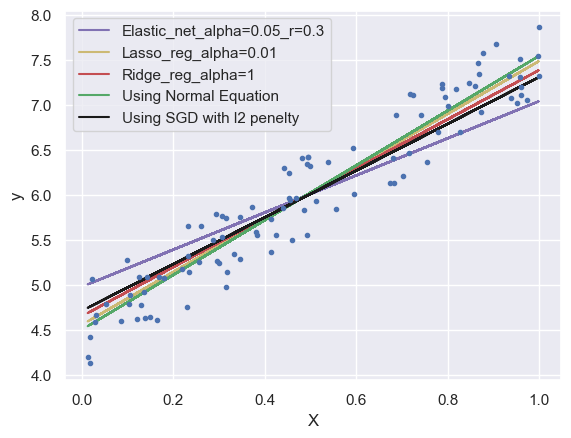

In [113]:
plt.plot(X_lin, np.dot(X_lin, elastic_net.coef_)+elastic_net.intercept_, 'm', label='Elastic_net_alpha=0.05_r=0.3')
plt.plot(X_lin, np.dot(X_lin, lasso_reg.coef_)+lasso_reg.intercept_, 'y', label='Lasso_reg_alpha=0.01')
plt.plot(X_lin, np.dot(X_lin, ridge_reg.coef_)+ridge_reg.intercept_, 'r', label='Ridge_reg_alpha=1')
plt.plot(X_lin, np.dot(X_b_lin, theta_best), '-g', label='Using Normal Equation')
plt.plot(X_lin, np.dot(X_lin, sgd_reg_with_l2_penelty.coef_)+sgd_reg_with_l2_penelty.intercept_, 'k', label='Using SGD with l2 penelty')
plt.plot(X_lin, y_lin, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()